<a href="https://colab.research.google.com/github/strombreake/oop.bp/blob/main/Map_colour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


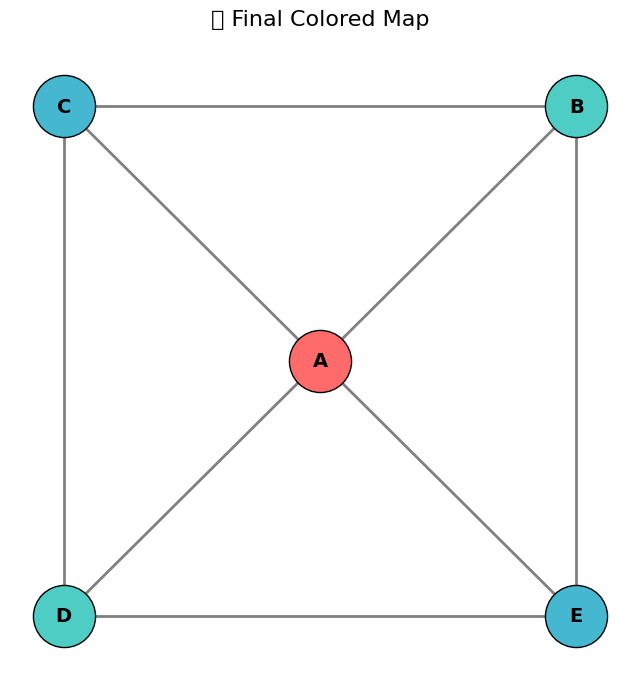

In [1]:
# Install required libraries (for Colab)
!pip install -q networkx matplotlib

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import time
from IPython.display import clear_output

class MapColoringCSP:
    def __init__(self):
        self.colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
        self.color_names = ['red', 'green', 'blue', 'yellow']

        self.regions = {
            'A': (0, 0),
            'B': (1, 1),
            'C': (-1, 1),
            'D': (-1, -1),
            'E': (1, -1)
        }

        self.color_assignments = {region: None for region in self.regions}

        self.adjacency = {
            'A': ['B', 'C', 'D', 'E'],
            'B': ['A', 'C', 'E'],
            'C': ['A', 'B', 'D'],
            'D': ['A', 'C', 'E'],
            'E': ['A', 'B', 'D']
        }

        self.G = nx.Graph()
        for region in self.regions:
            self.G.add_node(region, pos=self.regions[region])
        for region, neighbors in self.adjacency.items():
            for neighbor in neighbors:
                self.G.add_edge(region, neighbor)

    def is_valid_coloring(self, region, color):
        """Check if the color assignment is valid for the given region."""
        for adj in self.adjacency[region]:
            if self.color_assignments[adj] == color:
                return False
        return True

    def visualize(self, title="Map Coloring"):
        """Visualize the current state of the map."""
        clear_output(wait=True)  # Clear previous output for animation

        plt.figure(figsize=(8, 8))
        plt.title(title, pad=20, size=16)

        pos = nx.get_node_attributes(self.G, 'pos')
        nx.draw_networkx_edges(self.G, pos, edge_color='gray', width=2)

        # Draw nodes (regions)
        for region in self.regions:
            color = self.color_assignments[region]
            node_color = color if color else 'white'
            nx.draw_networkx_nodes(self.G, pos,
                                   nodelist=[region],
                                   node_color=node_color,
                                   node_size=2000,
                                   edgecolors='black')

        nx.draw_networkx_labels(self.G, pos, font_size=14, font_weight='bold')

        plt.axis('off')
        plt.show()

    def solve(self):
        """Solve the map coloring problem using backtracking."""
        def backtrack(region_list):
            if not region_list:
                return True

            region = region_list[0]
            for color, color_name in zip(self.colors, self.color_names):
                if self.is_valid_coloring(region, color):
                    self.color_assignments[region] = color
                    print(f"Trying {color_name} for region {region}")
                    self.visualize(f"Coloring Region {region} with {color_name}")
                    time.sleep(1)
                    if backtrack(region_list[1:]):
                        return True
                    self.color_assignments[region] = None  # backtrack
            return False

        uncolored = [r for r, c in self.color_assignments.items() if c is None]
        if backtrack(uncolored):
            print("\n✅ Map colored successfully!")
            self.visualize("🎨 Final Colored Map")
        else:
            print("\n❌ No solution found!")


def main():
    print("Initializing Map Coloring Problem...")
    map_csp = MapColoringCSP()

    print("\nInitial Map:")
    map_csp.visualize("Initial Map State")

    print("\nSolving the map...")
    map_csp.solve()

# Run main
main()
